# Libraries

In [117]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# importing libraries for VADER  
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, root_mean_squared_error
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from scipy.sparse import hstack
from sklearn.preprocessing import StandardScaler

# Loading the Files

Download the csv files into the `data/` directory.

train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

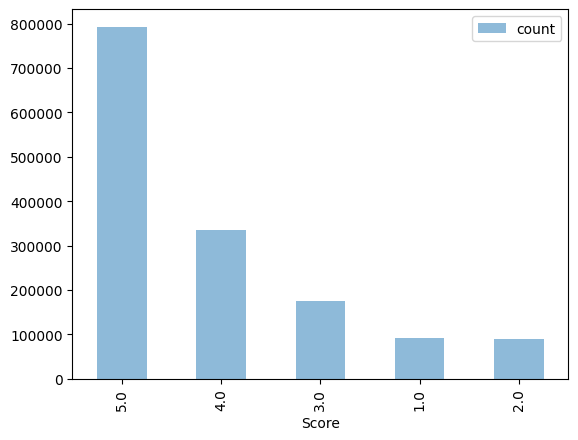


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [118]:
trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

# Data Exploration

### Exploring Helpfulness

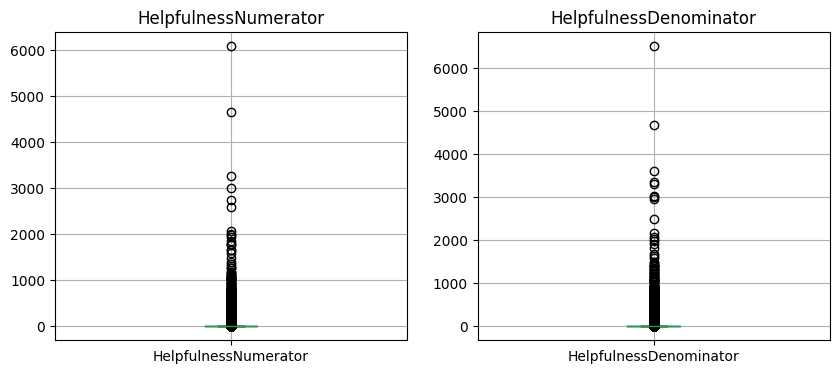

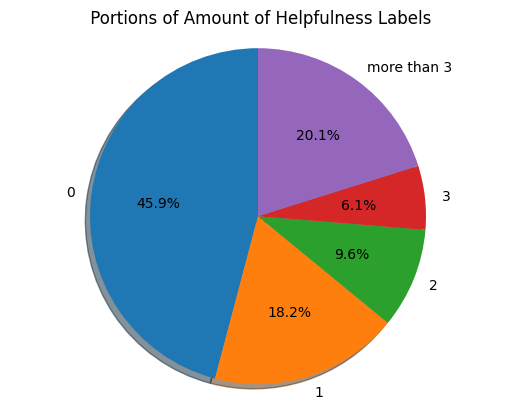

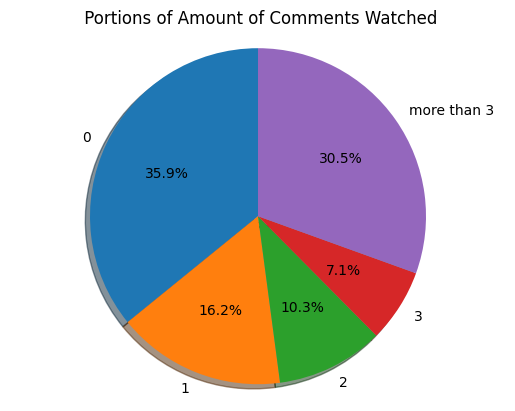

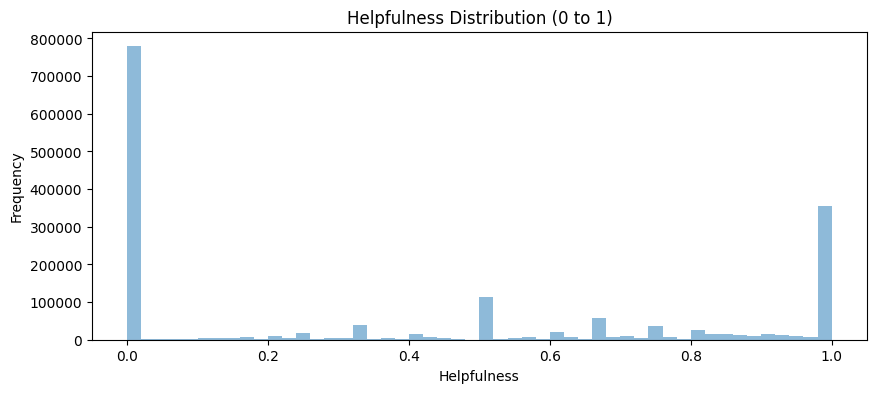

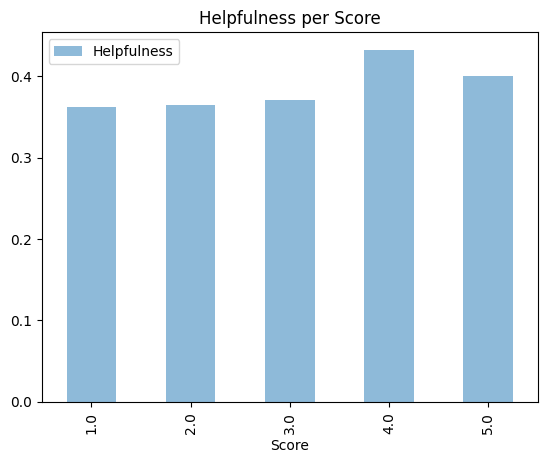

In [119]:
# Check for outliers in 'HelpfulnessNumerator' and 'HelpfulnessDenominator'
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
trainingSet.boxplot(column='HelpfulnessNumerator')
plt.title('HelpfulnessNumerator')
plt.subplot(1, 2, 2)
trainingSet.boxplot(column='HelpfulnessDenominator')
plt.title('HelpfulnessDenominator')
plt.show()

HelpfulnessNumerator0 = trainingSet[trainingSet['HelpfulnessNumerator'] == 0]['HelpfulnessNumerator'].value_counts()
HelpfulnessNumerator1 = trainingSet[trainingSet['HelpfulnessNumerator'] == 1]['HelpfulnessNumerator'].value_counts()
HelpfulnessNumerator2 = trainingSet[trainingSet['HelpfulnessNumerator'] == 2]['HelpfulnessNumerator'].value_counts()
HelpfulnessNumerator3 = trainingSet[trainingSet['HelpfulnessNumerator'] == 3]['HelpfulnessNumerator'].value_counts()
HelpfulnessNumeratorMoreThan3 = trainingSet[trainingSet['HelpfulnessNumerator'] > 3]['HelpfulnessNumerator'].value_counts()

labels = '0', '1', '2', '3', 'more than 3'
sizes = [HelpfulnessNumerator0.values.item(), HelpfulnessNumerator1.values.item(), HelpfulnessNumerator2.values.item(), 
         HelpfulnessNumerator3.values.item(), HelpfulnessNumeratorMoreThan3.values.sum()]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Helpfulness Labels')
plt.show()

HelpfulnessDenominator0 = trainingSet[trainingSet['HelpfulnessDenominator'] == 0]['HelpfulnessDenominator'].value_counts()
HelpfulnessDenominator1 = trainingSet[trainingSet['HelpfulnessDenominator'] == 1]['HelpfulnessDenominator'].value_counts()
HelpfulnessDenominator2 = trainingSet[trainingSet['HelpfulnessDenominator'] == 2]['HelpfulnessDenominator'].value_counts()
HelpfulnessDenominator3 = trainingSet[trainingSet['HelpfulnessDenominator'] == 3]['HelpfulnessDenominator'].value_counts()
HelpfulnessDenominatorMoreThan3 = trainingSet[trainingSet['HelpfulnessDenominator'] > 3]['HelpfulnessDenominator'].value_counts()

labels = '0', '1', '2', '3', 'more than 3'
sizes = [HelpfulnessDenominator0.values.item(), HelpfulnessDenominator1.values.item(), HelpfulnessDenominator2.values.item(), 
         HelpfulnessDenominator3.values.item(), HelpfulnessDenominatorMoreThan3.values.sum()]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Portions of Amount of Comments Watched')
plt.show()

trainingSet['Helpfulness'] = trainingSet['HelpfulnessNumerator'] / trainingSet['HelpfulnessDenominator']
trainingSet['Helpfulness'] = trainingSet['Helpfulness'].fillna(0)
# plotting the distribution of Helpfulness
plt.figure(figsize=(10, 4))
trainingSet['Helpfulness'].plot.hist(bins=50, alpha=0.5, range=(0, 1))
plt.title('Helpfulness Distribution (0 to 1)')
plt.xlabel('Helpfulness')
plt.ylabel('Frequency')
plt.show()

#checking skewness if HelfulnessNumerator
trainingSet[['Score', 'Helpfulness']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Helpfulness per Score")
plt.show()

**Helpfulness Numerator and Denominator Box Plots:**

The majority of values are clustered near 0, but some reviews have very high values for these fields.

**Helpfulness**

The distribution of Helpfulness shows a very clear skew toward values close to 0 and 1, which makes sense given that most reviews are either not rated as helpful (0) or are rated highly helpful (1).
More reviews are rated as not helpful.

**Helpfulness per Score**

Higher-rated reviews (4.0 and 5.0) are found more helpful by other users. 
There could be a potential correlation between positive reviews and perceived helpfulness.

### Exploring Class Imbalance

In [120]:
# Calculate the class imbalance
score_distribution = trainingSet['Score'].value_counts().sort_index()
class_imbalance = score_distribution.min() / score_distribution.max()
print(f"Class Frequency: {score_distribution}")
print()
print(f"Class Imbalance Ratio: {class_imbalance:.2f}")

Class Frequency: Score
1.0     91190
2.0     89678
3.0    176082
4.0    335228
5.0    793163
Name: count, dtype: int64

Class Imbalance Ratio: 0.11


**Class Imbalance**

Class imbalance is calculated as frequency of the least frequent class divided by the frequency of the most frequent class. 
In this analysis, the class imbalance ratio is 0.11, which indicates that the least frequent class appears 11% as often as the most frequent class.
This indicated a moderately high class imbalance which we will have to account for.
The class 2 is the least frequent

### Exploring Text and Summary

plot cloud images, see if they are similar

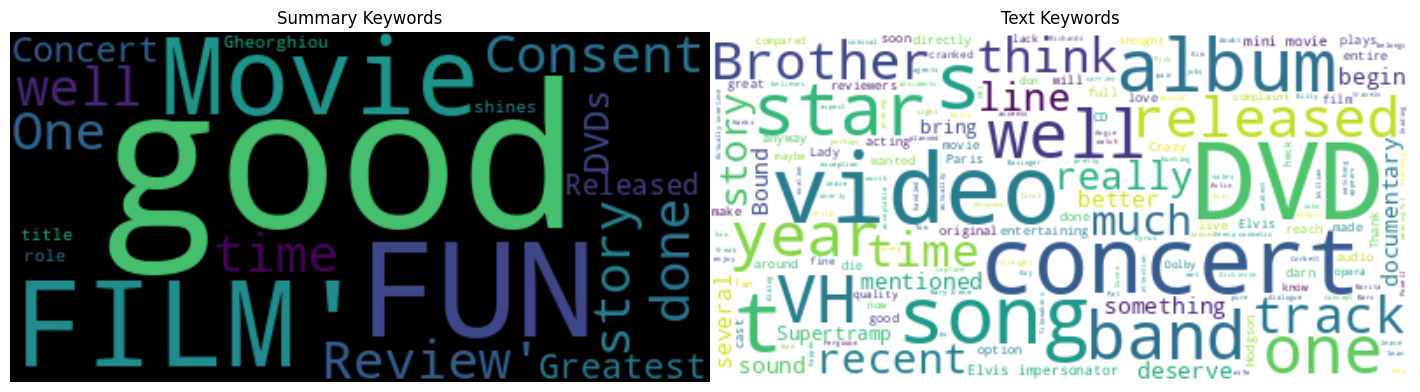

In [121]:
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(121)
text = trainingSet.Summary.values
wordcloud = WordCloud(
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
plt.title('Summary Keywords')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

ax = fig.add_subplot(122)
text = trainingSet.Text.values
wordcloud = WordCloud(
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
plt.title('Text Keywords')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Missing values

<Axes: >

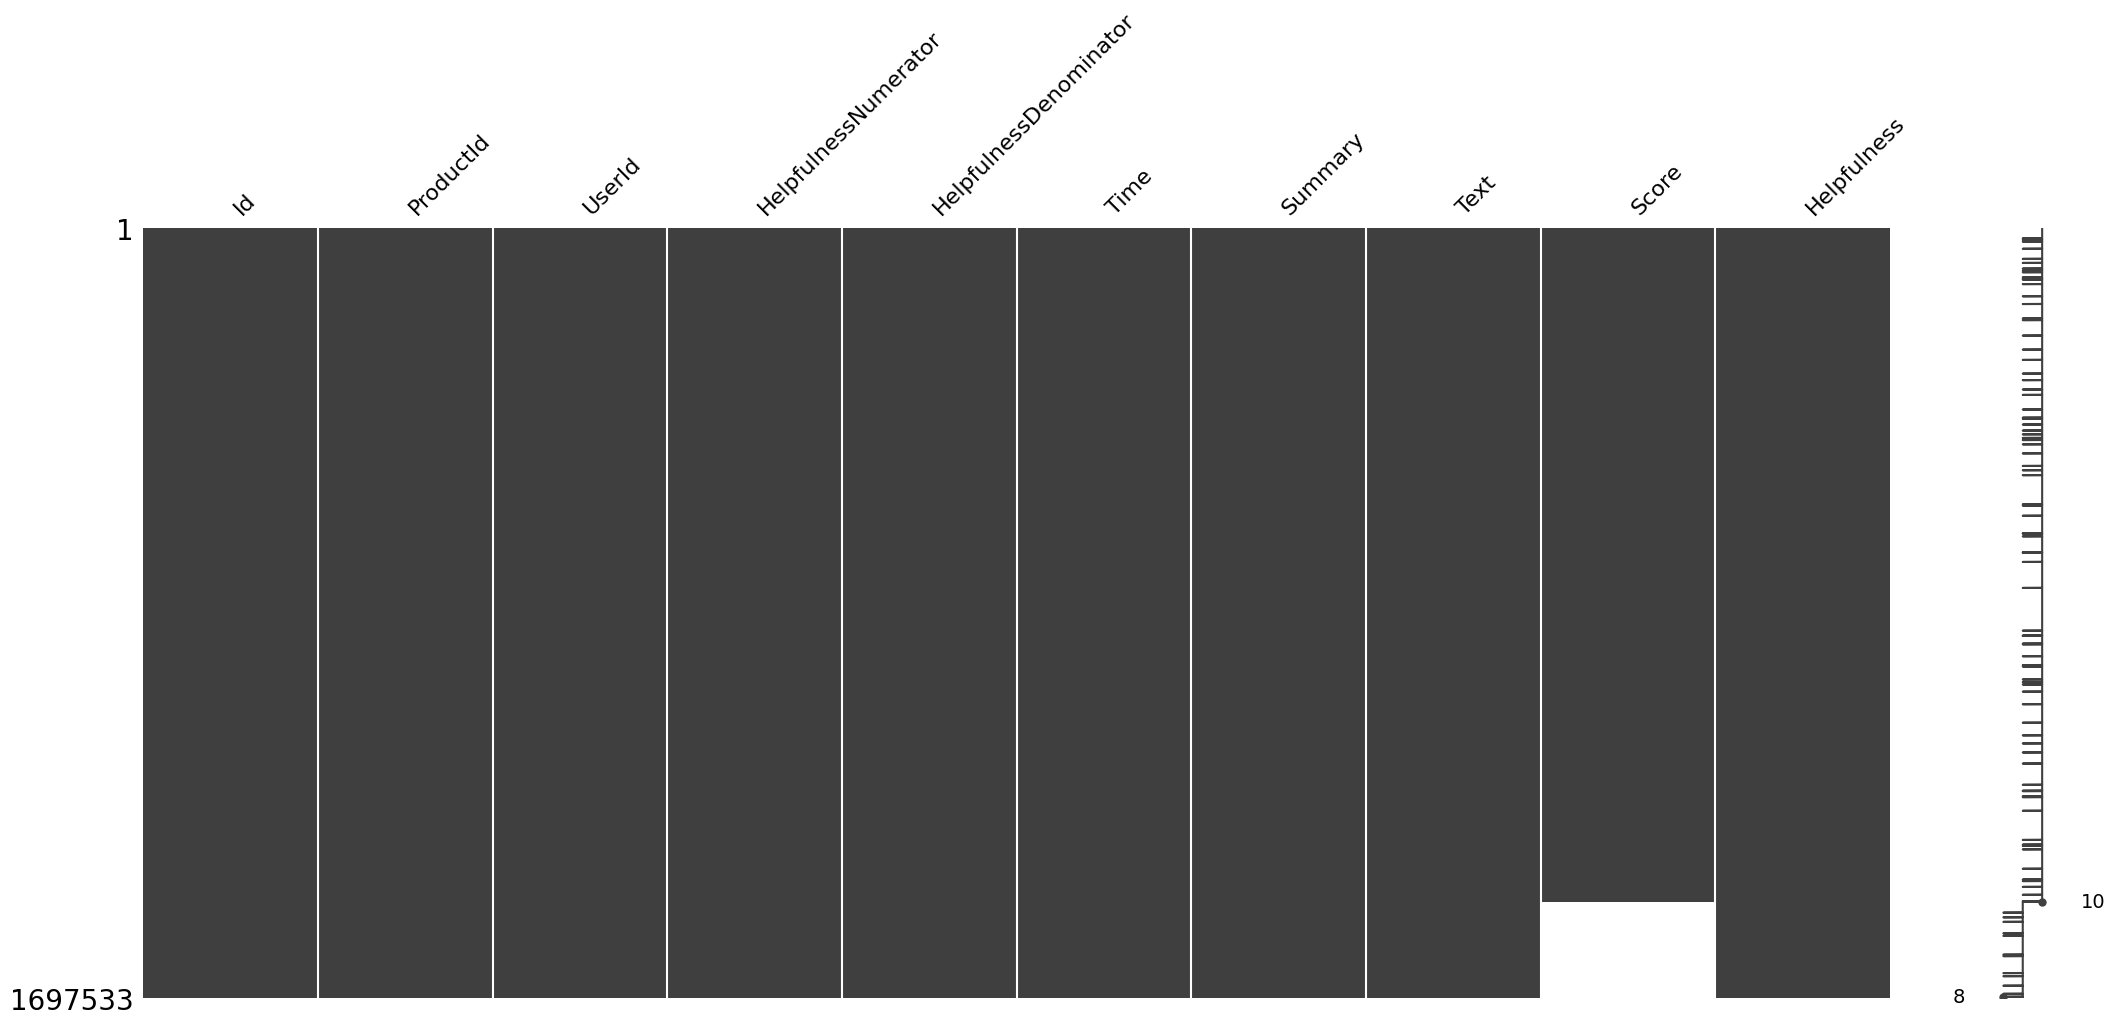

In [122]:
 msno.matrix(trainingSet) 

<Axes: >

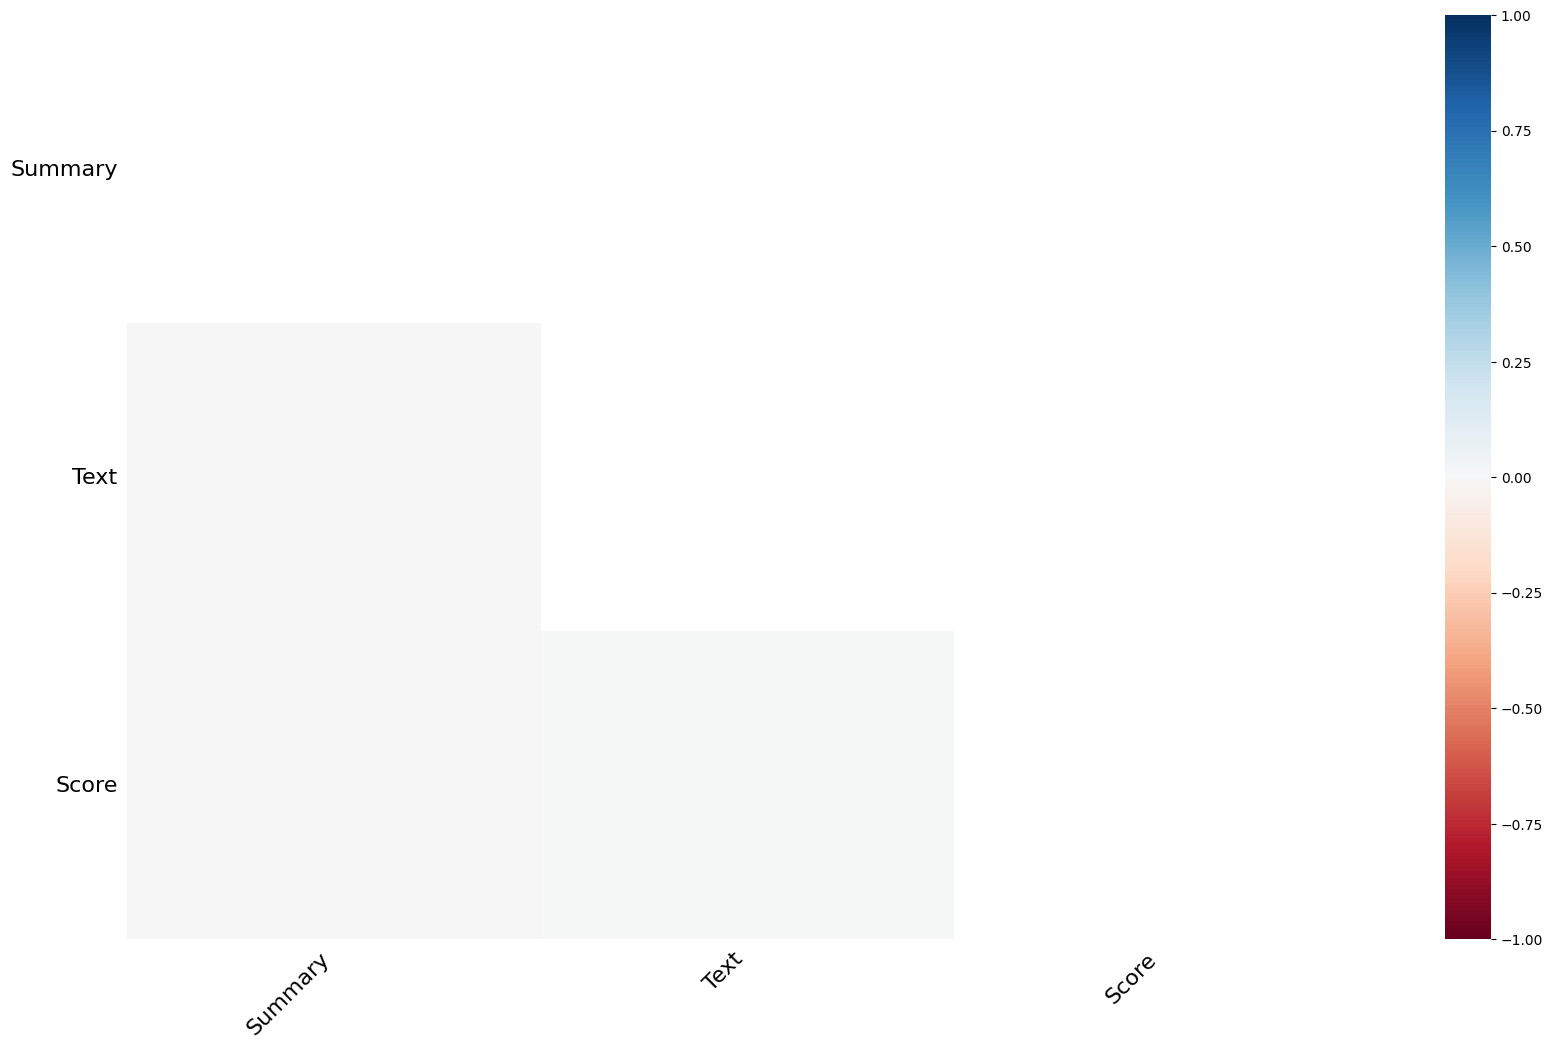

In [123]:
msno.heatmap(trainingSet)

# VADER Analysis

In [124]:
analyzer_trial = SentimentIntensityAnalyzer()

text = "While most straight to DVD films are not worth watching, this one is the exception.Kim Basinger plays a Pink Lady (Mary Kay) cosmetic sales lady who had met Elvis as a child. During her recent travels Elvis impersonators around her die from freak accidents. She falls in love with John Corbett (love at first sight) who she believes is also an Elvis impersonator because he carries around an Elvis suit which belongs to his soon to be ex-wife Denise Richards. The acting is pure ham, such as in Mars Attacks. The accents are overly done. The FBI agents hunting the pair are comical. The concept is original. The cast is full of stars (Tom Hanks, Sean Astin, Angie Dickinson, Billy Ray Cyrus, Pat Morita). The dialogue is so-so, perhaps the weakest aspect of the movie. The Elvis impersonators were so bad, you wanted them to die.Thank you. Thank you very much."
summary = "GOOD FUN FILM"

# print(trainingSet['Text'][0])
# print(trainingSet['Summary'][0])

# lets make text a little bigger and see how VADER would work
# first 100 rows
# for i in range(100):
#     print(analyzer.polarity_scores(trainingSet['Text'][i]))
#     print(analyzer.polarity_scores(trainingSet['Summary'][i]))
# 3.2 seconds for 100 rows

# now lets try to do it for the whole dataset

# sentiment_results = []
# rows_done = 0
# try: 
#     for i in range(len(trainingSet)):
#         # found out error regardin float values which come from NaN
#         # Ensure text is a string and handle non-strings (like NaN or float)
#         if not isinstance(trainingSet['Text'][i], str):
#             trainingSet.loc['Text'][i] = ''

#         sentiment = analyzer.polarity_scores(trainingSet['Text'][i])
#         sentiment_results.append(sentiment)
#         rows_done += 1

# # after five minutes 
# except KeyboardInterrupt:
#     # When you stop the code with Ctrl+C, catch the interruption and print the progress
#     print(f"Stopped after analyzing {rows_done} rows.")
#     print(f"Partial results (rows processed): {len(sentiment_results)}")
#     print(sentiment_results[:10])

print(analyzer_trial.polarity_scores(''))
# neutral score

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}


In [125]:
# import cProfile

# # Profile the function to see where it is slow
# cProfile.run('add_features_to(trainingSet)')

From the output I got i'm seeing that VADER that a long time computationally since it goes row by row processing.
There seems to be a bottleneck in the add_features_to() function — 192.257 seconds. The lambda functions responsible for sentiment analysis (<lambda>) and the chunk processing (process_chunk) are also contributing heavily to the runtime.

FIXED with parallel computing (below)

## More Data Preprocessing

In [126]:
# too many scores are 5.0
# lets try to balance the dataset
fives = trainingSet.loc[trainingSet['Score'] == 5]
fives = fives.sample(frac=0.5)
data = pd.concat([trainingSet.loc[trainingSet['Score'] != 5], fives])

In [127]:
OHE = OneHotEncoder()
IDs = OHE.fit_transform(data[['ProductId', 'UserId']])

# Adding Features

In [141]:
from joblib import Parallel, delayed
import multiprocessing

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get VADER compound score for a given text
def get_vader_sentiment(text, idx):
    if not isinstance(text, str):
        text = ''
    if idx % 100000 == 0:  # Print progress every 100,000 rows
        print(f"Processing row {idx}")
    return analyzer.polarity_scores(text)['compound']

def parallel_vader_sentiment(df, text_column):
    num_cores = multiprocessing.cpu_count()

    sentiment_scores = Parallel(n_jobs=num_cores)(
        delayed(get_vader_sentiment)(text, i) for i, text in enumerate(df[text_column])
    )
    return sentiment_scores

def add_features_to(df):
    # This is where you can do all your feature extraction

    # Calculate 'Helpfulness' feature
    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    # Drop HelpfulnessNumerator and HelpfulnessDenominator
    df = df.drop(columns=['HelpfulnessNumerator', 'HelpfulnessDenominator'])

    # Convert Time to datetime
    df['Time'] = pd.to_datetime(df['Time'], unit='s')
    # ridge does not work with datetime need to convert to int
    df['Year'] = df['Time'].dt.year
    df['Month'] = df['Time'].dt.month
    df['Day'] = df['Time'].dt.day
    df['DayOfWeek'] = df['Time'].dt.dayofweek
    df.drop(columns=['Time'], inplace=True)

    # impute missing values with empty strings
    df['Text'] = df['Text'].fillna('').astype(str)
    df['Summary'] = df['Summary'].fillna('').astype(str)
    # Convert any non-string entries in 'Text' column to strings
    # df['Text'] = df['Text'].astype(str)
    # df['Summary'] = df['Summary'].astype(str)

    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if row['Text'] else 0, axis = 1)

    # Extract the sentiment from the summary and text    
    df['Text_Sentiment'] = parallel_vader_sentiment(trainingSet, 'Text')
    # trainingSet['Summary_Sentiment'] = parallel_vader_sentiment(trainingSet, 'Summary')
    # created a lot of noise

    print(trainingSet[['Text_Sentiment']].head())
    
    return df

# Load the feature extracted files if they've already been generated
if exists('./data/X_train.csv'):
    X_train = pd.read_csv("./data/X_train.csv")
if exists('./data/X_submission.csv'):
    X_submission = pd.read_csv("./data/X_submission.csv")
else:
    # Process the DataFrame in chunks
    train = add_features_to(trainingSet)

    # Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train = train[train['Score'].notnull()]

    X_submission.to_csv("./data/X_submission.csv", index=False)
    X_train.to_csv("./data/X_train.csv", index=False)

Processing row 0
Processing row 100000
Processing row 200000
Processing row 300000
Processing row 400000
Processing row 500000
Processing row 600000
Processing row 700000
Processing row 800000
Processing row 900000
Processing row 1000000
Processing row 1100000
Processing row 1200000
Processing row 1300000
Processing row 1400000
Processing row 1500000
Processing row 1600000
   Text_Sentiment
0         -0.6205
1          0.4939
2          0.9733
3          0.9750
4          0.9981


# Sample + Split into training and testing set

In [142]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=42
)

In [143]:
print("Columns in X_train:", X_train.columns)
print("Columns in X_submission:", X_submission.columns)

Columns in X_train: Index(['Id', 'ProductId', 'UserId', 'Summary', 'Text', 'Helpfulness',
       'Text_Sentiment', 'Year', 'Month', 'Day', 'DayOfWeek', 'ReviewLength'],
      dtype='object')
Columns in X_submission: Index(['Id', 'ProductId', 'UserId', 'Summary', 'Text', 'Helpfulness',
       'Text_Sentiment', 'Year', 'Month', 'Day', 'DayOfWeek', 'ReviewLength',
       'Score'],
      dtype='object')


# Feature Selection

In [144]:
features = ['Id', 'Text_Sentiment', 'Helpfulness', 'DayOfWeek', 'ReviewLength']

X_train_select = X_train[features]
X_test_select = X_test[features]
X_submission_select = X_submission[features]

# Model Creation

In [145]:
# # Learn the model
# # model = KNeighborsClassifier(n_neighbors=3).fit(X_train_select, Y_train)

# # error: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4], got [1. 2. 3. 4. 5.]
# Y_train_adjusted = Y_train - 1
# Y_test_adjusted = Y_test - 1

# model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# model.fit(X_train_select, Y_train_adjusted)

# # Predict the score using the model
# Y_test_predictions = model.predict(X_test_select)

# # convert predictions back
# Y_test_predictions += 1

# Learn the model
# model = KNeighborsClassifier(n_neighbors=20).fit(X_train_select, Y_train)
# model = KNeighborsClassifier(n_neighbors=20, weights='distance', metric='manhattan').fit(X_train_select, Y_train)

# # Predict the score using the model
# Y_test_predictions = model.predict(X_test_select)

# Define the parameter grid

param_grid = {
'alpha': [1.0, 4.0, 5.0, 10.0]
}

# Initialize the Ridge model
ridge = Ridge()
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_select, Y_train)
# Retrieve the best parameters
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha parameter: {best_alpha}")
# Fit the Ridge model using the best alpha parameter
ridge_optimized = Ridge(alpha=best_alpha).fit(X_train_select, Y_train)
# Predict the score using the model
Y_test_predictions = ridge_optimized.predict(X_test_select).clip(1, 5)

Best alpha parameter: 4.0


# Model Evaluation

RMSE on testing set = 1.1046198065799098
Accuracy on testing set =  0.2578231036042829


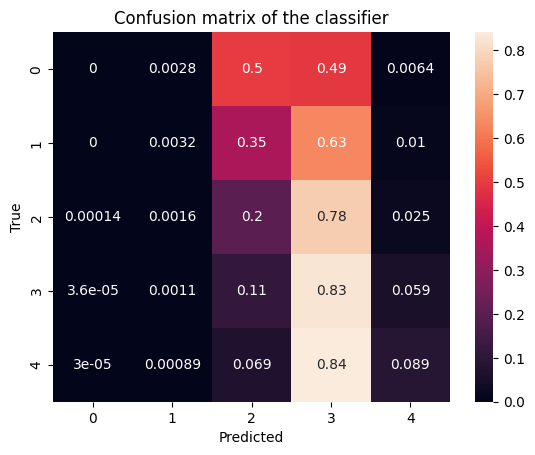

In [149]:
# Evaluate your model on the testing set
import numpy as np

# Manually calculate RMSE
rmse = np.sqrt(np.mean((Y_test - Y_test_predictions) ** 2))
print("RMSE on testing set =", rmse)

# If your predictions are continuous, round them to nearest integer
Y_test_predictions = Y_test_predictions.round().astype(int)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [150]:
# Create the submission file
X_submission['Score'] = ridge_optimized.predict(X_submission_select).clip(1, 5)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)